In [30]:
#Description: This program classifies images

In [31]:
#Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [32]:
#Load the data
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [33]:
X_test.shape

(10000, 32, 32, 3)

In [34]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [35]:
Y_train = Y_train.reshape(-1)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [36]:
Y_test = Y_test.reshape(-1)

In [37]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"] 

In [38]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x_train[1])
    plt.xlabel(classes[y[index]])

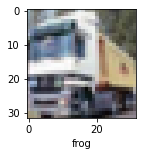

In [40]:
    plot_sample(X_train, Y_train, 0)

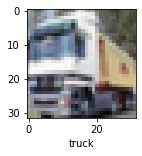

In [41]:
plot_sample(X_train, Y_train, 1)

In [42]:
X_train = X_train / 255
X_test = X_test / 255.0

In [15]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 124s 79ms/step - loss: 1.8594 - accuracy: 0.3359
Epoch 2/5
1563/1563 [==============================] - 119s 76ms/step - loss: 1.6563 - accuracy: 0.4137
Epoch 3/5
1563/1563 [==============================] - 118s 75ms/step - loss: 1.5702 - accuracy: 0.4462
Epoch 4/5
1563/1563 [==============================] - 118s 76ms/step - loss: 1.5090 - accuracy: 0.4664
Epoch 5/5
1563/1563 [==============================] - 118s 75ms/step - loss: 1.4576 - accuracy: 0.4867s - loss: 1.4


In [43]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
Y_pred = ann.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print("Classification Report: \n", classification_report(Y_test, Y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.47      0.53      1000
           1       0.64      0.53      0.58      1000
           2       0.25      0.66      0.37      1000
           3       0.39      0.25      0.30      1000
           4       0.54      0.18      0.27      1000
           5       0.46      0.31      0.37      1000
           6       0.52      0.51      0.52      1000
           7       0.64      0.44      0.52      1000
           8       0.64      0.63      0.63      1000
           9       0.45      0.69      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.46     10000
weighted avg       0.52      0.47      0.46     10000



In [44]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [45]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [19]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4593 - accuracy: 0.4737
Epoch 2/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.1161 - accuracy: 0.6112
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9880 - accuracy: 0.6557
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9030 - accuracy: 0.6875
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8391 - accuracy: 0.7096
Epoch 6/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7829 - accuracy: 0.7275
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7344 - accuracy: 0.7458
Epoch 8/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6906 - accuracy: 0.7590
Epoch 9/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6481 - accuracy: 0.7742
Epoch 10/10
1563/1563 [==============================] - 25s 16m

In [20]:
cnn.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9309 - accuracy: 0.6985


[0.9309031963348389, 0.6984999775886536]

In [22]:
Y_pred = cnn.predict(X_test)
Y_pred[:5]

array([[1.3269312e-03, 4.5135166e-05, 4.0875864e-04, 9.7424501e-01,
        1.7887809e-04, 1.4607941e-02, 4.8955814e-03, 4.2657426e-05,
        4.2246426e-03, 2.4385385e-05],
       [5.2452984e-04, 3.8749896e-02, 2.7652907e-06, 7.5190081e-07,
        3.1136068e-08, 1.2319346e-07, 1.4762265e-09, 3.0965575e-07,
        9.6024245e-01, 4.7921040e-04],
       [6.1515763e-02, 2.0396955e-02, 1.0951388e-03, 2.5482723e-03,
        2.2052386e-04, 3.3382716e-04, 1.2374490e-04, 2.5979622e-04,
        8.8136852e-01, 3.2137506e-02],
       [9.7097677e-01, 2.4565265e-03, 1.1643455e-03, 1.2693226e-03,
        7.7979928e-03, 2.5018328e-05, 9.5489568e-06, 1.7597271e-05,
        1.6128790e-02, 1.5423131e-04],
       [1.6173298e-06, 3.0751821e-06, 1.1949481e-02, 2.2789853e-02,
        4.2402800e-02, 2.3982183e-03, 9.2044741e-01, 1.8998209e-06,
        5.3942208e-06, 3.2934940e-07]], dtype=float32)

In [23]:
Y_classes = [np.argmax(element) for element in Y_pred]
Y_classes[:5]

[3, 8, 8, 0, 6]

In [24]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

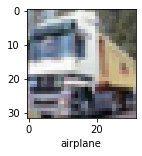

In [25]:
plt_sample(X_test, Y_test, 3)

In [26]:
classes[y_classes[3]]

'airplane'

In [28]:
classes[y_classes[3]]

'airplane'